In [1]:
import pandas as pd
from matplotlib import pyplot as plt

**Queue Add Without timing memory management**

In [2]:
df_q = pd.read_csv("profiling_basic_queue.csv")

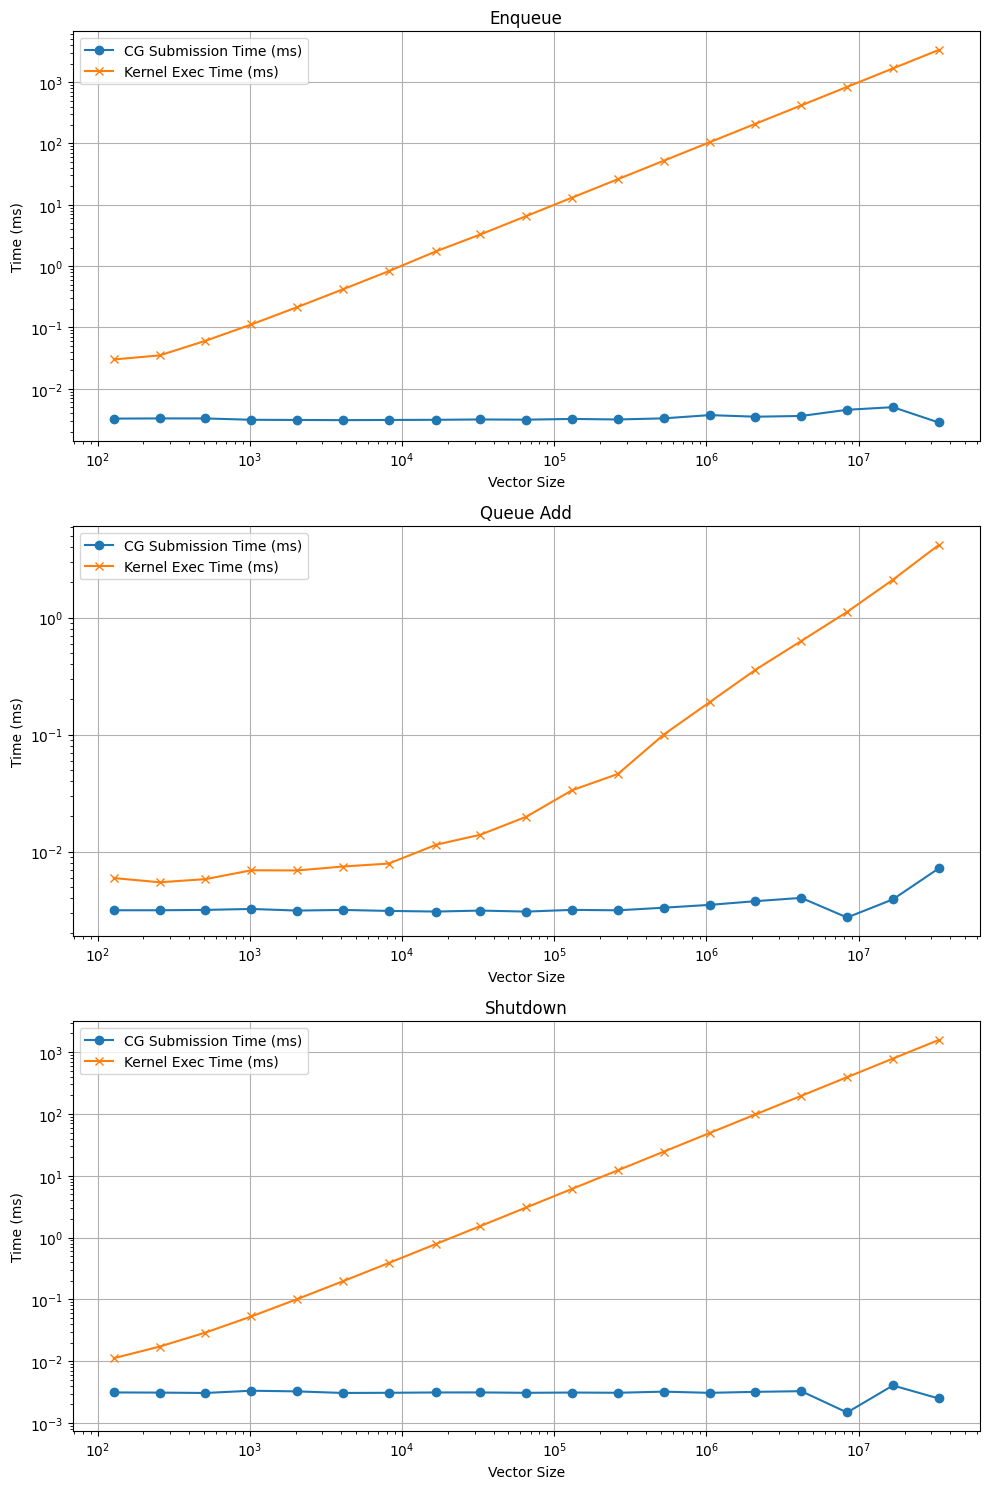

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

events = df_q["Event"].unique()
for i, event in enumerate(events):
    subset = df_q[df_q["Event"] == event]
    axes[i].plot(subset["VectorSize"], subset["CGSubmissionTime(ms)"], label="CG Submission Time (ms)", marker='o')
    axes[i].plot(subset["VectorSize"], subset["KernelExecTime(ms)"], label="Kernel Exec Time (ms)", marker='x')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_title(event)
    axes[i].set_xlabel("Vector Size")
    axes[i].set_ylabel("Time (ms)")
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

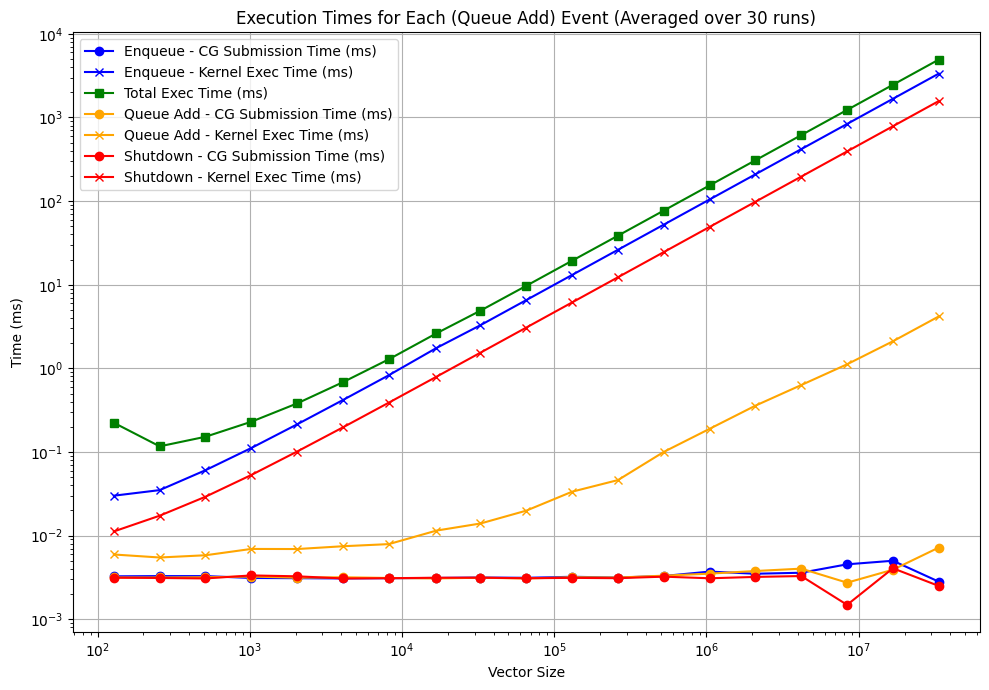

In [4]:
fig, ax = plt.subplots(figsize=(10, 7))

colors = ['blue', 'orange', 'red']  # Different colors for different events
markers = ['o', 'x', 's']  # Different markers for CG Submission, Kernel Exec, and Total Exec

for i, event in enumerate(events):
    subset = df_q[df_q["Event"] == event]
    ax.plot(subset["VectorSize"], subset["CGSubmissionTime(ms)"], label=f"{event} - CG Submission Time (ms)", color=colors[i], marker='o')
    ax.plot(subset["VectorSize"], subset["KernelExecTime(ms)"], label=f"{event} - Kernel Exec Time (ms)", color=colors[i], marker='x')
    if i == 0:  # Plot total execution time once
        ax.plot(subset["VectorSize"], subset["TotalExecTime(ms)"], label="Total Exec Time (ms)", color='green', marker='s')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Execution Times for Each (Queue Add) Event (Averaged over 50 runs)")
ax.set_xlabel("Vector Size")
ax.set_ylabel("Time (ms)")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


**Basic Add Without Timing Memory Management**

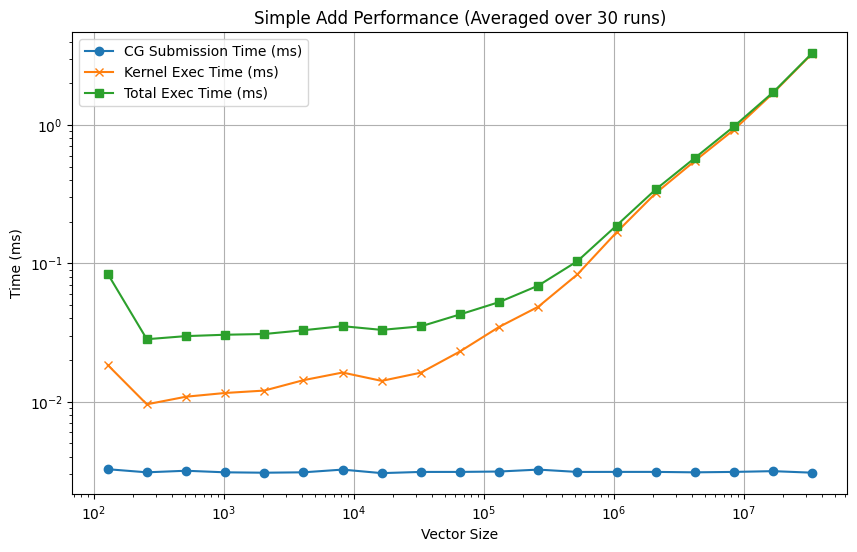

In [6]:
df_simple_add = pd.read_csv("profiling_basic_va.csv")

# Plot for Single Scalar Add
plt.figure(figsize=(10, 6))

plt.plot(df_simple_add["VectorSize"], df_simple_add["CGSubmissionTime(ms)"], label="CG Submission Time (ms)", marker='o')
plt.plot(df_simple_add["VectorSize"], df_simple_add["KernelExecTime(ms)"], label="Kernel Exec Time (ms)", marker='x')
plt.plot(df_simple_add["VectorSize"], df_simple_add["TotalExecTime(ms)"], label="Total Exec Time (ms)", marker='s')

plt.xscale('log')
plt.yscale('log')
plt.title("Simple Add Performance (Averaged over 50 runs)")
plt.xlabel("Vector Size")
plt.ylabel("Time (ms)")
plt.grid(True)
plt.legend()

plt.show()

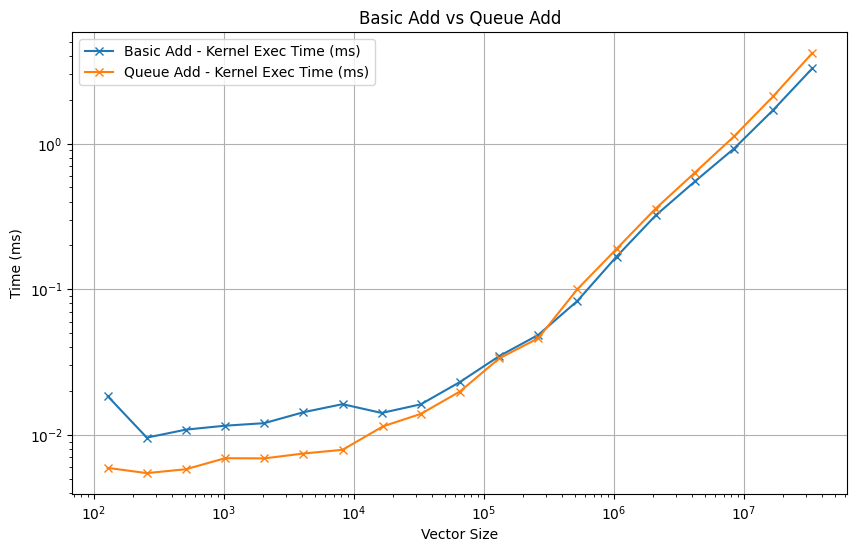

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(df_simple_add["VectorSize"], df_simple_add["KernelExecTime(ms)"], label="Basic Add - Kernel Exec Time (ms)", marker='x')
event = "Queue Add"
subset = df_q[df_q["Event"] == event]
plt.plot(subset["VectorSize"], subset["KernelExecTime(ms)"], label=f"{event} - Kernel Exec Time (ms)", marker='x')

plt.xscale('log')
plt.yscale('log')
plt.title("Basic Add vs Queue Add")
plt.xlabel("Vector Size")
plt.ylabel("Time (ms)")
plt.grid(True)
plt.legend()

plt.show()

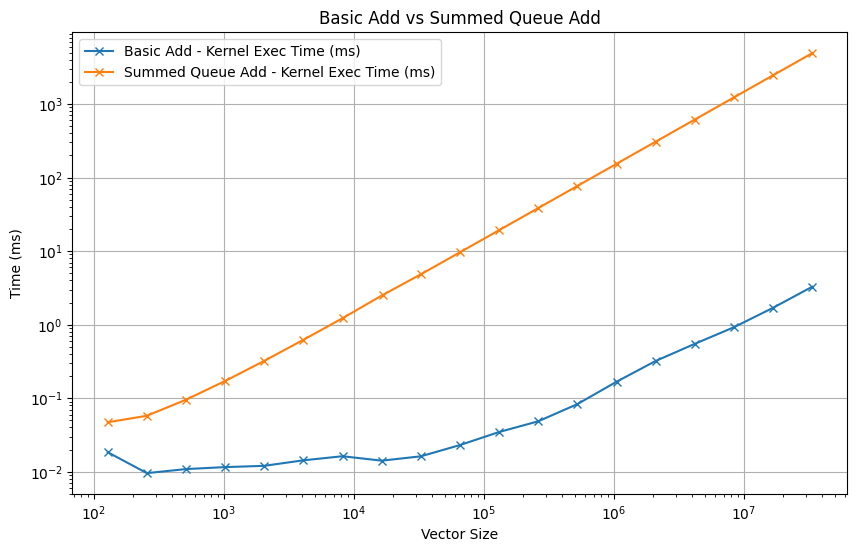

In [8]:
# Sum the KernelExecTime(ms) for each VectorSize across all events
aggregated = df_q.groupby("VectorSize")["KernelExecTime(ms)"].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(df_simple_add["VectorSize"], df_simple_add["KernelExecTime(ms)"], label="Basic Add - Kernel Exec Time (ms)", marker='x')

# Plot the aggregated Kernel Exec Time for each vector size
plt.plot(aggregated["VectorSize"], aggregated["KernelExecTime(ms)"], label="Total Queue Add - Kernel Exec Time (ms)", marker='x')

plt.xscale('log')
plt.yscale('log')
plt.title("Basic Add vs Summed Queue Add")
plt.xlabel("Vector Size")
plt.ylabel("Time (ms)")
plt.grid(True)
plt.legend()

plt.show()